# Normal Modes (continued)

In a polyatomic molecule we can write out each bond as a harmonic oscillator.  This leads to an energy function

$\hat{H}(\mathbf{R}) = 0.5 \sum_{i=1}^N k_ix_i^2$,

where $\mathbf{R}$ are the coordinates of all atoms, $N$ is the number of bonds in the molecule, $k_i$ is the force constant of bond $i$, and $x_i$ is the displacement from equilibrium position for bond $i$.  This equation is for a set of coupled harmonic oscillators, multiple $x_i$s will depend on the position of one atom, making it quite a challenging problem to solve.  If, instead, we can change our basis and write this as sum over independent harmonic oscillators

$\hat{H}(\mathbf{Q}) = 0.5 \sum_{i=1}^N k_iq_i^2$,

where $\mathbf{Q}$ are the transformed coordinates and $q_i$ is the displacement from equilibrium for oscillator $i$.  $\mathbf{Q}$  are typically reffered to as the normal modes of the system.  These are found by diagonlizing the Hessian matrix.  The Hessian matrix, $\mathbf{H}$, is the second derivative matrix an element of which is defined as

$H_{ij} = \frac{d^2E}{dx_idx_j}$.

*Example: Coupled Oscillators in 1D*

Consider a system with two masses, $m_1$ and $m_2$, $m_1$ is connected to a wall by a sprint, $m_2$ is connected to a wall by another spring and the two masses are connected together with a third spring.  The Hamiltonian for the system can be written as

$H(\mathbf{x}_1,\mathbf{x}_2) = 1/2k_1(x_1-x_1^0)^2 + 1/2k_2(x_2-x_2^0)^2 + 1/2k_3((x_2-x_1) - x_{12}^0)^2$

where $x_1$ is the position of mass 1, $x_1^0$ is the equilibrium position of spring 1 etc.  We note that the last term in the Hamiltonian couples the positions of masses 1 and 2 and is what makes this problem somewhat challenging.  We will use normal modes to decouple these.  We need to compute and then diagonalize the Hessian matrix.  In this case the Hessian matrix is a 2x2 matrix:

$\mathbf{H} = \begin{bmatrix} \frac{d^2E}{dx_1^2} & \frac{d^2E}{dx_1dx_2} \\ \frac{d^2E}{dx_2dx_1}& \frac{d^2E}{dx_2^2}\end{bmatrix} = \begin{bmatrix} k_1 + k_2 & -k_3 \\ -k_3 & k_2+k_3\end{bmatrix}$

In [1]:
# toy problem
import numpy as np
k1 = 1.0
k2 = 1.0
k3 = 1.0
H = np.matrix([[k1+k2,-k3],[-k3,k2+k3]],dtype=float)
e,v=np.linalg.eig(H)
print(v)
print(e)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[3. 1.]


*Example: water molecule*

For a water molecule, we have two bonds between three atoms.  We can write out the classical energy as

$E(\mathbf{x}_1,\mathbf{x}_2,\mathbf{x}_3) = 1/2k(d(\mathbf{x}_1,\mathbf{x}_2) - d_0)^2 + 1/2k(d(\mathbf{x}_3,\mathbf{x}_2) - d_0)^2 + 1/2k(\theta(\mathbf{x}_1,\mathbf{x}_2,\mathbf{x}_3)-\theta_0)^2$,

where $\mathbf{x}_i$  is the position of atom $i$, atoms 1 and 3 are hydrogen atoms, $d(\mathbf{x}_1,\mathbf{x}_2)$ is the distance between atoms 1 and 2, and both bonds have the same equilibrium distance and force constant.  

We need to compute the second derivatives of the energy function to populate the Hessian matrix.  We will do so using numeric differentiation.

In [4]:
from scipy.misc import derivative
# let's perform a normal mode analysis for water:
k1 = 529.58 # kcal/mol/A^2
k3 = 37.95  # kcal/mol/rad^2
theta0 = 112.0 * np.pi/180.0
x0 = 1.0

#def E(h1,o2,h3):
#    return 0.5*k1*(np.sqrt(np.linalg.norm(o2-h1))-x0)**2+0.5*k1*(np.sqrt(np.linalg.norm(o2-h3))-x0)**2
def E(coordinates):
    h1 = coordinates[:3]
    o2 = coordinates[3:6]
    h3 = coordinates[6:9]
    r21 = h1 - o2
    r23 = h3 - o2
    theta = np.arccos(np.dot(r21,r23))
    return 0.5*k1*(np.sqrt(np.linalg.norm(o2-h1))-x0)**2+0.5*k1*(np.sqrt(np.linalg.norm(o2-h3))-x0)**2 + 0.5*k3*(theta-theta0)**2   

def first_derivative(coordinates,i,dx1):
    dx = np.zeros(coordinates.size,dtype=np.float64)
    dx[i] = dx1
    return (E(coordinates+dx)-E(coordinates-dx))/(2*dx1)
    
def second_derivative(coordinates,i,j,dx1):
    dx = np.zeros(coordinates.size,dtype=np.float64)
    dx[i] = dx1
    second_derivative = (first_derivative(coordinates+dx,j,dx1)-first_derivative(coordinates-dx,j,dx1))/(2*dx1)
    return second_derivative
    
h1 = np.array([np.cos(np.pi/2.0-theta0/2.0),np.sin(np.pi/2.0-theta0/2.0),0],dtype=np.float64)
o2 = np.array([0,0,0],dtype=np.float64)
h3 = np.array([-np.cos(np.pi/2.0-theta0/2.0),np.sin(np.pi/2.0-theta0/2.0),0],dtype=np.float64)
coordinates = np.hstack((h1,o2,h3))
masses = np.empty(coordinates.size,dtype=float)
masses[0:3] = 1.008E-3
masses[3:6] = 16.0E-3
masses[6:9] = 1.008E-3
# we need to compute the Hessian matrix (3x3 second derivative matrix)
H = np.empty((9,9),dtype=np.float64)
dx1 = 1E-4
for i in range(9):
    for j in range(9):
        H[i,j] = second_derivative(coordinates,i,j,dx1)/np.sqrt(masses[i]*masses[j])

e,v=np.linalg.eig(H)
idx = e.argsort()   
e = e[idx]
v = v[:,idx]

e = np.sqrt(e)*np.sqrt(4.184E23)/(3.0E10*2*np.pi)

print e[-1],e[-2],e[-3]
print v[:,-1],v[:,-2],v[:,-3]

1356.7602015688938 1296.3883876844122 915.9076242233524
[ 6.82376487e-01  1.74691635e-01  5.13018129e-18  1.99201995e-15
 -8.76945049e-02 -1.48413103e-26 -6.82376487e-01  1.74691635e-01
  2.92597721e-34] [ 5.62372819e-01  3.79325257e-01 -1.75045847e-17 -2.82308916e-01
 -5.70973788e-16  5.46350352e-26  5.62372819e-01 -3.79325257e-01
 -3.06380662e-34] [-1.85370792e-01  6.43064978e-01 -1.22208893e-16 -2.45457021e-17
 -3.22816058e-01  7.55519894e-25  1.85370792e-01  6.43064978e-01
  1.72635504e-33]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in sqrt


(-2, 2)

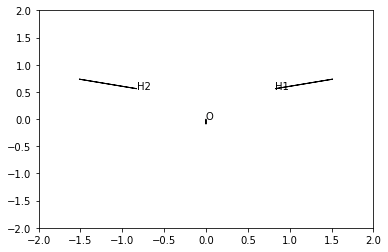

In [23]:
import matplotlib.pyplot as plt
#ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
plt.arrow(h1[0],h1[1],v[0,-1],v[1,-1],fc='r')
plt.arrow(o2[0],o2[1],v[3,-1],v[4,-1],fc='r')
plt.arrow(h3[0],h3[1],v[6,-1],v[7,-1],fc='r')
plt.text(h1[0],h1[1],'H1')
plt.text(o2[0],o2[1],'O')
plt.text(h3[0],h3[1],'H2')
plt.xlim(-2,2)
plt.ylim(-2,2)

(-2, 2)

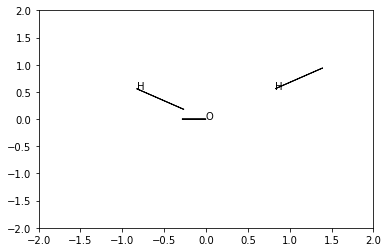

In [22]:
import matplotlib.pyplot as plt
#ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
plt.arrow(h1[0],h1[1],v[0,-2],v[1,-2],fc='r')
plt.arrow(o2[0],o2[1],v[3,-2],v[4,-2],fc='r')
plt.arrow(h3[0],h3[1],v[6,-2],v[7,-2],fc='r')
plt.text(h1[0],h1[1],'H')
plt.text(o2[0],o2[1],'O')
plt.text(h3[0],h3[1],'H')
plt.xlim(-2,2)
plt.ylim(-2,2)

(-2, 2)

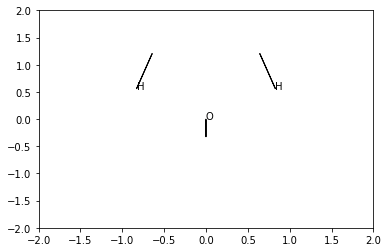

In [24]:
import matplotlib.pyplot as plt
#ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
plt.arrow(h1[0],h1[1],v[0,-3],v[1,-3],fc='r')
plt.arrow(o2[0],o2[1],v[3,-3],v[4,-3],fc='r')
plt.arrow(h3[0],h3[1],v[6,-3],v[7,-3],fc='r')
plt.text(h1[0],h1[1],'H')
plt.text(o2[0],o2[1],'O')
plt.text(h3[0],h3[1],'H')
plt.xlim(-2,2)
plt.ylim(-2,2)

Note that the Hamiltonian for this model of a water molecule is classical.  Also, we need to compute more than just the frequency of the modes to get the IR spectra.  We also need to know how much the dipole moment changes along a particular mode.  

<Container object of 3 artists>

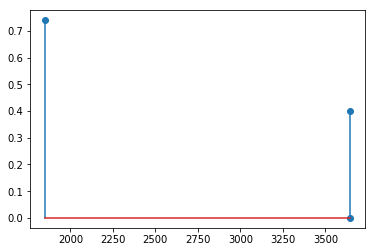

In [47]:
# plot stick spectra
from scipy import integrate
from scipy.special import hermite
from scipy.special import factorial

def dipole_moment(q,r):
    dipole = np.zeros(3,dtype=float)
    for atom in range(q.size):
        dipole += q[atom]*r[atom*3:atom*3+3]
    return np.linalg.norm(dipole)

q = np.empty(3,dtype=float)
q[0] = 0.42   # partial charge on hydrogen in electron charge units
q[1] = -0.84  # partial charge on oxygen in electron charge units
q[2] = 0.42

wavenumber = np.empty(3,dtype=float)
wavenumber[0] = e[-1]
wavenumber[1] = e[-2]
wavenumber[2] = e[-3]

dx = 1E-4 
oscillatorStrength = np.empty(3,dtype=float)
oscillatorStrength[0] = (dipole_moment(q,coordinates+v[:,-1]*dx)-dipole_moment(q,coordinates-v[:,-1]*dx))/(2*dx)
oscillatorStrength[1] = (dipole_moment(q,coordinates+v[:,-2]*dx)-dipole_moment(q,coordinates-v[:,-2]*dx))/(2*dx)
oscillatorStrength[2] = (dipole_moment(q,coordinates+v[:,-3]*dx)-dipole_moment(q,coordinates-v[:,-3]*dx))/(2*dx)

plt.stem(wavenumber,oscillatorStrength)


Compare this to the experimental or DFT computed values.  From DFT we get frequencies of 1714 cm$^-1$, 3724 cm$^-1$ and 3845 cm$^-1$ and IR intensities of 75, 1.6 and 19 for the bend, symmetric stretch and antisymmetric stretch respectively.  

## Spectral Broadening

The results from any quantum mechanical description of vibrations will be a set of transitions at particular frequences.  This is typically represented as a stick spectrum as opposed to the more broad features seen in experimental spectra.  Broadening is categorized into *homogenous broadening* and *inhomogenous broadening* effects. 

### Homogenous Broadening

Effects that broaden the observed transitions of all quantum absorbers (or emitters) in the system equally are termed homogenous.  These include the natural line width (i.e. uncertainty principle) and collisional effects.  These effects can be accurately represented by a Lorentzian line shape.  



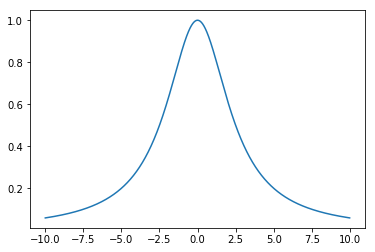

In [33]:
fwhm = 5
lorentz_constant = fwhm**2/4.0
x0 = 0.0
x=np.arange(-10,10,0.01)
lorentz = lorentz_constant / ( (x-x0)**2 + (0.25*fwhm**2))
plt.plot(x,lorentz)

### Inhomogenous Broadening

Phenomena in a system that effect different oscillators differenty are lead to inhomogenous broadening.  These include solvent effects among other things.  These can be represented using a guassian.

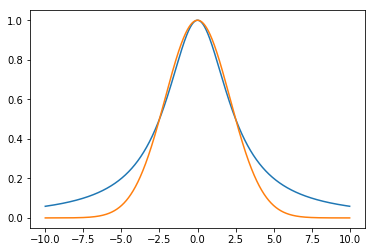

In [37]:
fwhm = 5
lorentz_constant = fwhm**2/4.0
fwhm_constants = 4.0*np.log(2.0)/(fwhm**2)
x0 = 0.0
x=np.arange(-10,10,0.01)
lorentz = lorentz_constant / ( (x-x0)**2 + (0.25*fwhm**2))
gaussian = np.exp(-fwhm_constants*(x-x0)**2)
plt.plot(x,lorentz)
plt.plot(x,gaussian)